In [1]:
import pandas as pd
import os

# Folder containing the CSVs
data_path = '../data/yfinance_data'

# List of tickers you want to load
tickers = ['AAPL', 'AMZN', 'GOOG', 'META', 'MSFT', 'NVDA', 'TSLA']

# Dictionary to hold each ticker's DataFrame
stock_data = {}

# Loop through each ticker and load its CSV
for ticker in tickers:
    file_path = os.path.join(data_path, f"{ticker}_historical_data.csv")
    df = pd.read_csv(file_path, parse_dates=['Date'])
    df.set_index('Date', inplace=True)
    stock_data[ticker] = df

    
# preview head of each
stock_data['AAPL'].head()



,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
Date,,,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.098943,469033600,0.0,0.0
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093781,175884800,0.0,0.0
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086898,105728000,0.0,0.0
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089049,86441600,0.0,0.0
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091630,73449600,0.0,0.0


In [2]:
import yfinance as yf

# Example for AAPL
aapl = yf.Ticker('AAPL')

# Fetch financial data
financials = aapl.financials
print(financials)

                                                        2024-09-30  \
Tax Effect Of Unusual Items                                    0.0   
Tax Rate For Calcs                                           0.241   
Normalized EBITDA                                   134661000000.0   
Net Income From Continuing Operation Net Minori...   93736000000.0   
Reconciled Depreciation                              11445000000.0   
Reconciled Cost Of Revenue                          210352000000.0   
EBITDA                                              134661000000.0   
EBIT                                                123216000000.0   
Net Interest Income                                            NaN   
Interest Expense                                               NaN   
Interest Income                                                NaN   
Normalized Income                                    93736000000.0   
Net Income From Continuing And Discontinued Ope...   93736000000.0   
Total Expenses      

In [3]:
import yfinance as yf

# List of tickers
tickers = ['AAPL', 'AMZN', 'GOOG', 'META', 'MSFT', 'NVDA', 'TSLA']

# Dictionary to hold financial data
financial_data = {}

for ticker in tickers:
    stock = yf.Ticker(ticker)
    financial_data[ticker] = {
        'financials': stock.financials,
        'balance_sheet': stock.balance_sheet,
        'cash_flow': stock.cashflow,
        'info': stock.info
    }

## Analyze Relationships

In this step, we analyze how stock prices relate to financial metrics like total revenue.

1. **Plotting Function**: We create a function to plot stock prices and total revenue for each ticker.
  
2. **Data Alignment**: We align financial data with stock prices by date to ensure accurate comparisons.

3. **Visualization**: We use Matplotlib to create a graph showing:
   - **Close Price** (in blue)
   - **Total Revenue** (in orange)

4. **Iterate Through Tickers**: We loop through each ticker to generate these plots.

This helps us see trends and relationships between financial performance and stock prices.

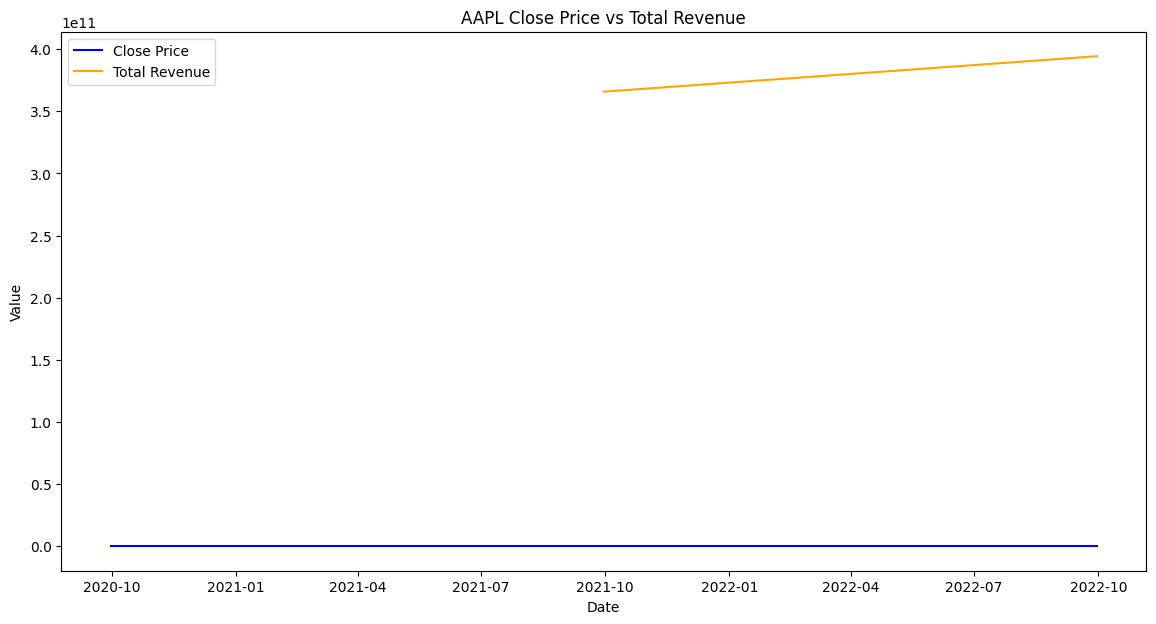

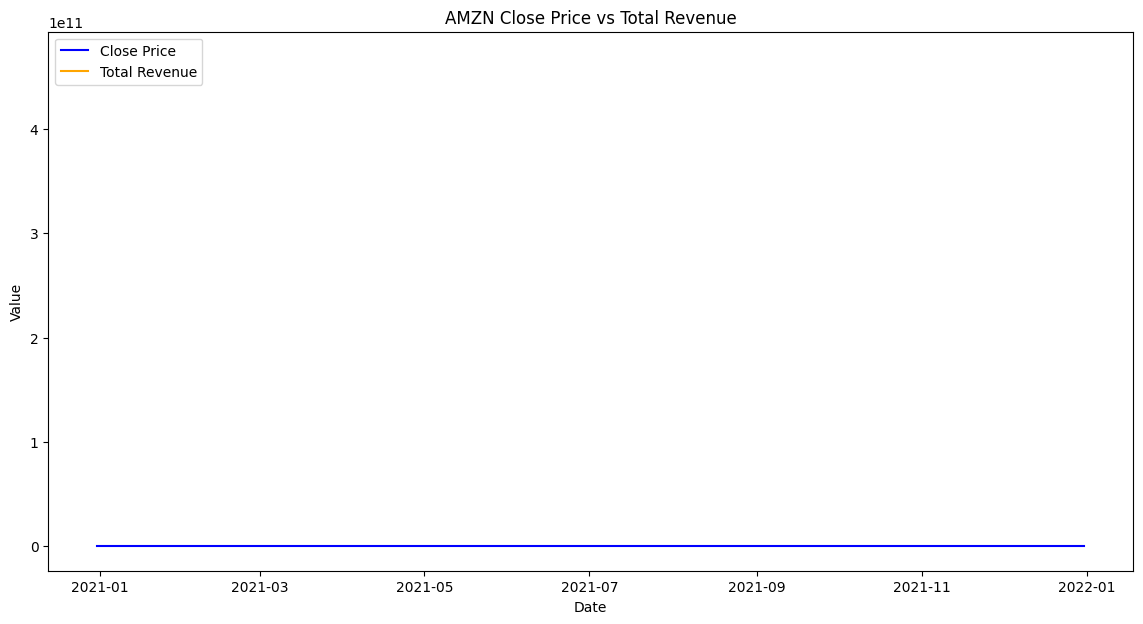

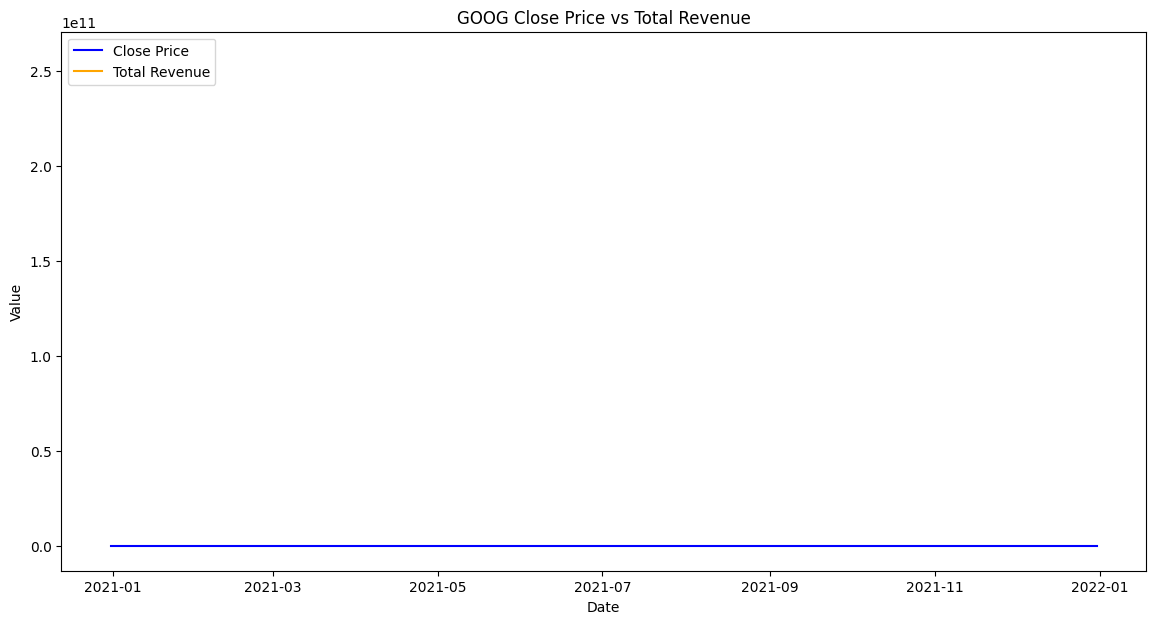

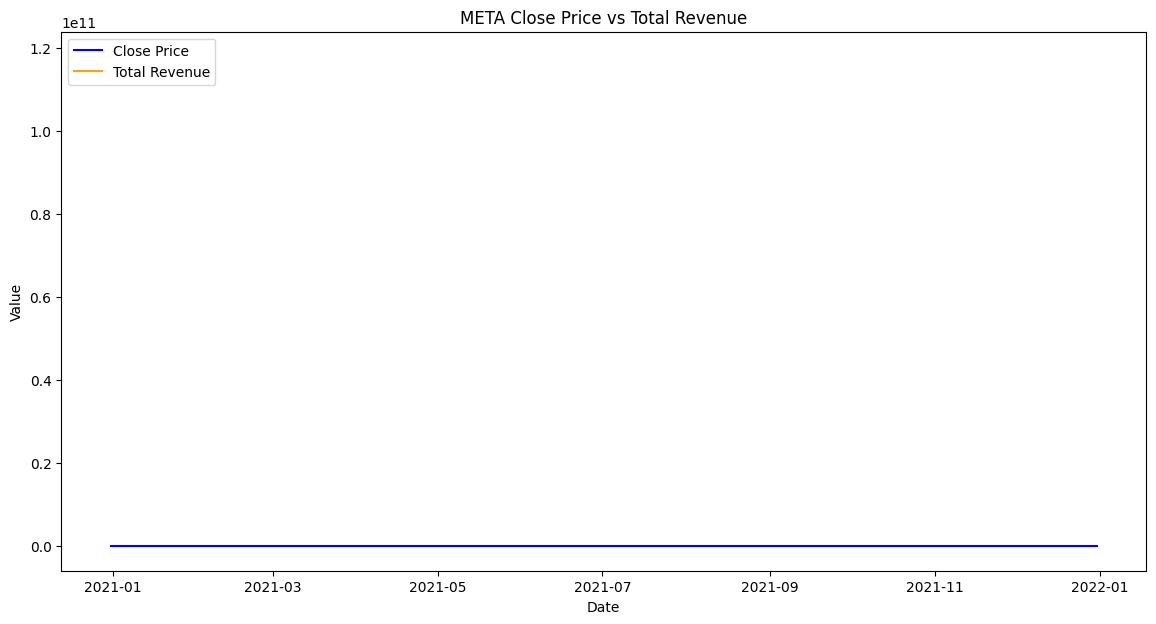

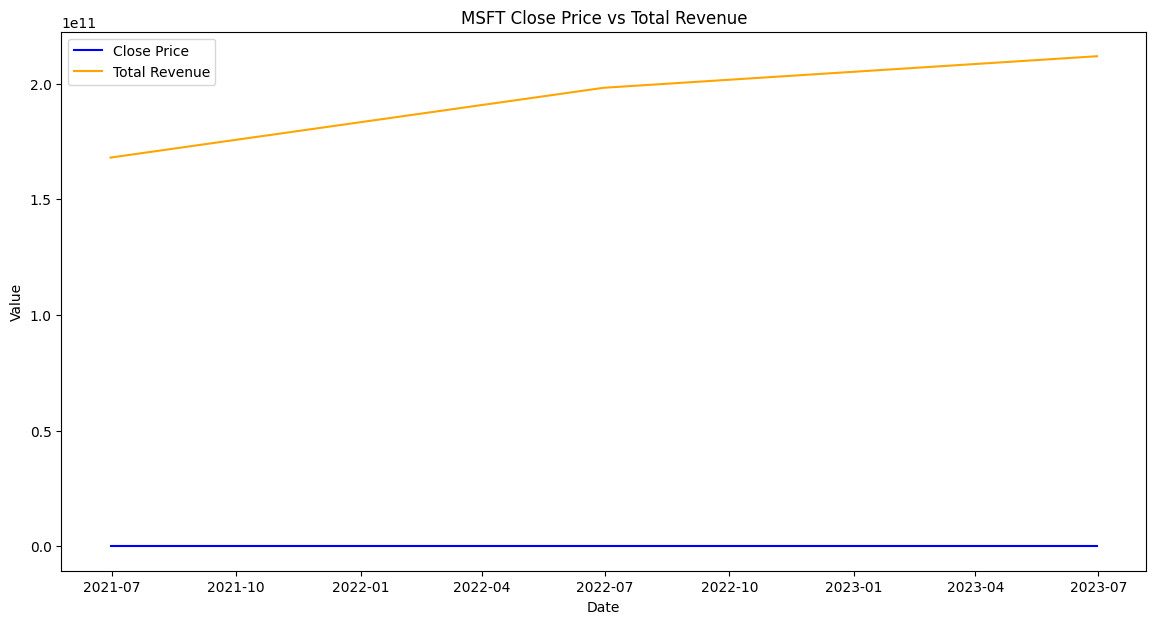

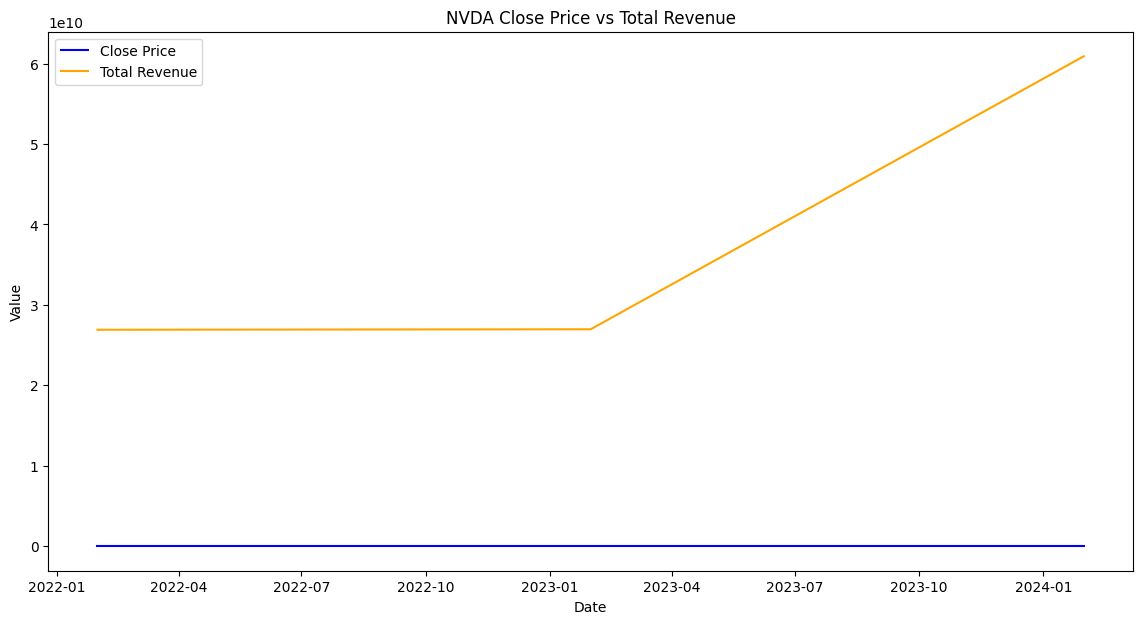

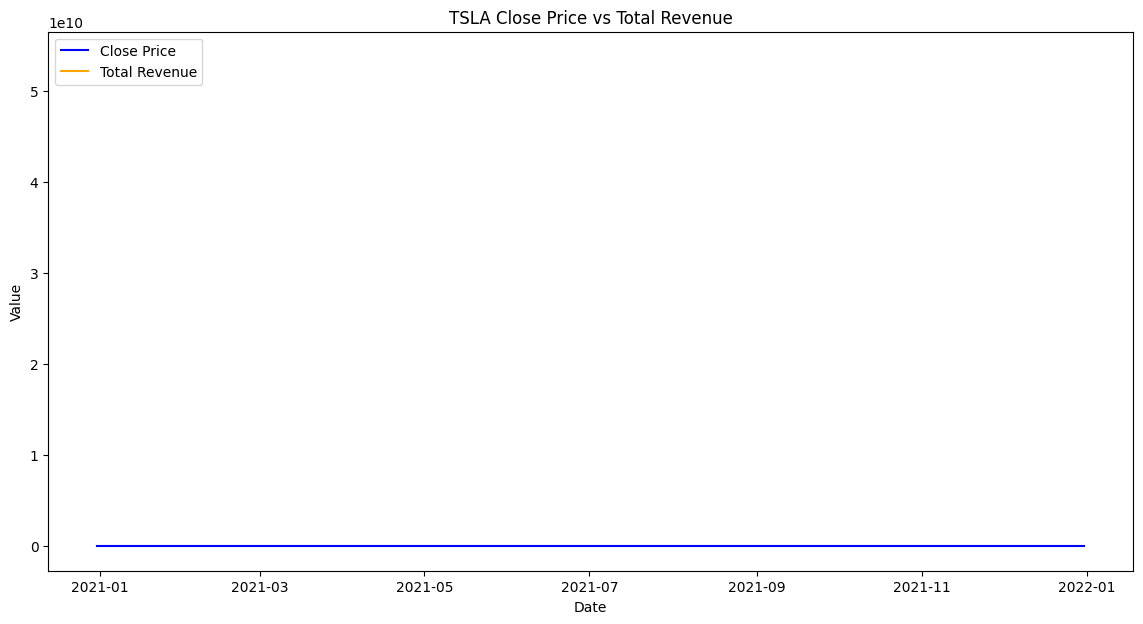

In [4]:
import matplotlib.pyplot as plt

def plot_financials_vs_price(ticker, stock_data):
    financials = financial_data[ticker]['financials']
    stock_prices = stock_data[ticker]

    # Ensure the metrics are aligned by date
    financials = financials.T  # Transpose for easier access
    financials.index = pd.to_datetime(financials.index)  # Ensure index is datetime

    # Merge the financials with the stock data
    merged_data = stock_prices[['Close']].join(financials[['Total Revenue']], how='inner')

    # Plotting
    plt.figure(figsize=(14, 7))
    plt.plot(merged_data['Close'], label='Close Price', color='blue')
    plt.plot(merged_data['Total Revenue'], label='Total Revenue', color='orange')
    plt.title(f'{ticker} Close Price vs Total Revenue')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.legend()
    plt.show()

# Loop through each ticker to generate plots
for ticker in tickers:
    plot_financials_vs_price(ticker, stock_data)


## Analysis of Simple Moving Average (SMA) and Exponential Moving Average (EMA)

### Overview

We calculated the 20-day Simple Moving Average (SMA\_20) and Exponential Moving Average (EMA\_20) for the stock data. These moving averages help smooth out price data to identify trends and potential support/resistance levels.

### Output Preview (Excerpt for AAPL)

| Date       | Close  | SMA\_20 | EMA\_20 |
| ---------- | ------ | ------- | ------- |
| 2024-07-24 | 218.54 | 224.23  | 222.38  |
| 2024-07-25 | 217.49 | 224.44  | 221.91  |
| 2024-07-26 | 217.96 | 224.63  | 221.54  |
| 2024-07-29 | 218.24 | 225.01  | 221.22  |
| 2024-07-30 | 218.80 | 225.12  | 220.99  |

### Interpretation

* **SMA\_20** represents the average closing price over the last 20 trading days. It reacts slower to recent price changes and provides a smooth trend line.
* **EMA\_20** gives more weight to recent prices, making it more responsive to recent price movements compared to SMA.

### Observations

* Both SMA\_20 and EMA\_20 values are currently **above the recent closing prices**, which may indicate a short-term bearish trend or a recent price pullback.
* The EMA\_20 is consistently **lower than the SMA\_20**, reflecting its sensitivity to recent price drops.
* Traders often use the crossover between price and moving averages to signal potential entry/exit points:

  * If the close price crosses above the SMA or EMA, it can indicate a bullish signal.
  * If the close price drops below these averages, it may suggest bearish momentum.

In [8]:
stock_data['AAPL']['SMA_20'] = stock_data['AAPL']['Close'].rolling(window=20).mean()
stock_data['AAPL']['EMA_20'] = stock_data['AAPL']['Close'].ewm(span=20, adjust=False).mean()


In [9]:
for ticker, df in stock_data.items():
    df['SMA_20'] = df['Close'].rolling(window=20).mean()
    df['EMA_20'] = df['Close'].ewm(span=20, adjust=False).mean()

print(stock_data['AAPL'].tail())


                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2024-07-24  224.000000  224.800003  217.130005  218.539993  218.287323   
2024-07-25  218.929993  220.850006  214.619995  217.490005  217.238556   
2024-07-26  218.699997  219.490005  216.009995  217.960007  217.708008   
2024-07-29  216.960007  219.300003  215.750000  218.240005  217.987686   
2024-07-30  219.190002  220.330002  216.119995  218.800003  218.547043   

              Volume  Dividends  Stock Splits      SMA_20      EMA_20  
Date                                                                   
2024-07-24  61777600        0.0           0.0  224.228500  222.376929  
2024-07-25  51391200        0.0           0.0  224.440500  221.911508  
2024-07-26  41601300        0.0           0.0  224.633500  221.535174  
2024-07-29  36311800        0.0           0.0  225.014500  221.221349  
2024-07-30  41643800        0.0           0.0  22

## Calculation of RSI (Relative Strength Index)

The Relative Strength Index (RSI) is a popular momentum oscillator used in technical analysis to measure the speed and change of price movements. RSI values range from 0 to 100, where:

RSI above 70 typically indicates an overbought condition (possible price pullback)

RSI below 30 typically indicates an oversold condition (possible price rebound)

## Implementation Details
Since the TA-Lib library is not used, RSI was calculated manually using the following approach:

Compute the daily price differences (delta) of the closing prices.

Separate gains and losses from delta:

Gains are positive changes (delta > 0), losses are negative changes (delta < 0).

Calculate the average gain and average loss over a 14-day rolling window.

Compute the Relative Strength (RS) as the ratio of average gain to average loss.

In [11]:
def calculate_rsi(df, window=14):
    delta = df['Close'].diff()
    gain = delta.clip(lower=0)
    loss = -delta.clip(upper=0)

    avg_gain = gain.rolling(window=window).mean()
    avg_loss = loss.rolling(window=window).mean()

    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

# Apply RSI calculation to each ticker's DataFrame
for ticker, df in stock_data.items():
    df['RSI_14'] = calculate_rsi(df)

# Preview output for AAPL
print(stock_data['AAPL'].tail())


                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2024-07-24  224.000000  224.800003  217.130005  218.539993  218.287323   
2024-07-25  218.929993  220.850006  214.619995  217.490005  217.238556   
2024-07-26  218.699997  219.490005  216.009995  217.960007  217.708008   
2024-07-29  216.960007  219.300003  215.750000  218.240005  217.987686   
2024-07-30  219.190002  220.330002  216.119995  218.800003  218.547043   

              Volume  Dividends  Stock Splits      SMA_20      EMA_20  \
Date                                                                    
2024-07-24  61777600        0.0           0.0  224.228500  222.376929   
2024-07-25  51391200        0.0           0.0  224.440500  221.911508   
2024-07-26  41601300        0.0           0.0  224.633500  221.535174   
2024-07-29  36311800        0.0           0.0  225.014500  221.221349   
2024-07-30  41643800        0.0           0


## RSI (Relative Strength Index) Calculation and Analysis

### Sample Output (Excerpt for AAPL)

| Date       | Close  | SMA\_20 | EMA\_20 | RSI\_14 |
| ---------- | ------ | ------- | ------- | ------- |
| 2024-07-24 | 218.54 | 224.23  | 222.38  | 46.48   |
| 2024-07-25 | 217.49 | 224.44  | 221.91  | 38.65   |
| 2024-07-26 | 217.96 | 224.63  | 221.54  | 37.02   |
| 2024-07-29 | 218.24 | 225.01  | 221.22  | 36.04   |
| 2024-07-30 | 218.80 | 225.12  | 220.99  | 28.94   |

### Interpretation

* The RSI values are trending downward and approaching the oversold threshold of 30.
* On **2024-07-30**, RSI is approximately 28.94, which may indicate that AAPL is entering an oversold state and might experience a potential rebound.
* This RSI trend aligns with the price being below both SMA\_20 and EMA\_20, suggesting a short-term bearish momentum.

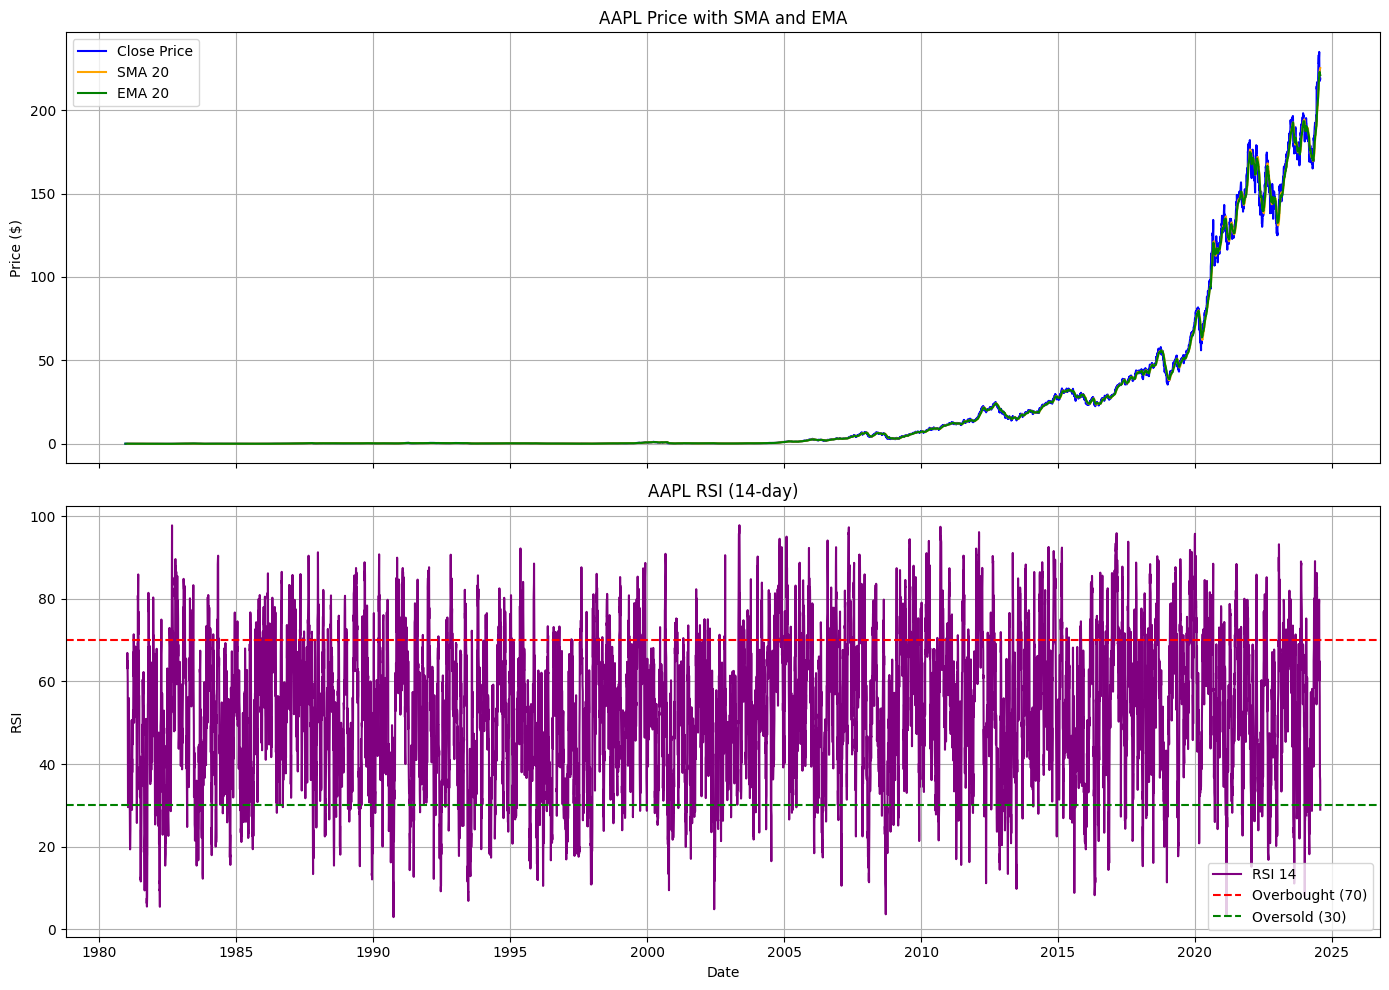

In [12]:
import matplotlib.pyplot as plt

# Select the stock data to visualize
df = stock_data['AAPL']

# Create a figure with 2 subplots (price + RSI)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

# Plot Closing price, SMA, EMA
ax1.plot(df.index, df['Close'], label='Close Price', color='blue')
ax1.plot(df.index, df['SMA_20'], label='SMA 20', color='orange')
ax1.plot(df.index, df['EMA_20'], label='EMA 20', color='green')
ax1.set_title('AAPL Price with SMA and EMA')
ax1.set_ylabel('Price ($)')
ax1.legend()
ax1.grid(True)

# Plot RSI
ax2.plot(df.index, df['RSI_14'], label='RSI 14', color='purple')
ax2.axhline(70, color='red', linestyle='--', label='Overbought (70)')
ax2.axhline(30, color='green', linestyle='--', label='Oversold (30)')
ax2.set_title('AAPL RSI (14-day)')
ax2.set_ylabel('RSI')
ax2.set_xlabel('Date')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()



## Using PyNance for Financial Metrics Analysis

In addition to calculating technical indicators like SMA, EMA, and RSI, we use **PyNance** to compute essential financial metrics that provide deeper insights into stock performance and risk characteristics. These metrics complement our technical analysis by quantifying returns, volatility, and risk-adjusted performance.

### Metrics Calculated

* **Daily Returns**: Percentage change in closing price from one trading day to the next. This helps understand short-term stock price movement.

* **Annualized Volatility**: Standard deviation of daily returns scaled by the square root of trading days in a year (typically 252). It measures the stock’s price fluctuations and risk.

* **Sharpe Ratio**: Risk-adjusted return metric that compares the excess return (above the risk-free rate) to the stock’s volatility. A higher Sharpe ratio indicates better risk-adjusted performance.

### Approach

1. Calculate daily returns from the closing price using PyNance’s built-in functions.
2. Compute annualized volatility using the daily returns.
3. Calculate the Sharpe ratio assuming a fixed risk-free rate (e.g., 2%).
4. Optionally, explore additional metrics such as CAGR or Beta for further analysis.

### Benefits

* Quantifies risk and return characteristics beyond price trends.
* Facilitates comparison across different stocks or periods.
* Supports informed investment decision-making by combining technical and financial insights.

In [19]:
import ta

df = stock_data['AAPL'].copy()

# Calculate RSI
df['RSI_14'] = ta.momentum.rsi(df['Close'], window=14)

# Calculate MACD
macd = ta.trend.MACD(df['Close'])
df['MACD'] = macd.macd()
df['MACD_Signal'] = macd.macd_signal()

# Calculate SMA and EMA
df['SMA_20'] = ta.trend.sma_indicator(df['Close'], window=20)
df['EMA_20'] = ta.trend.ema_indicator(df['Close'], window=20)

print(df.tail())


                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2024-07-24  224.000000  224.800003  217.130005  218.539993  218.287323   
2024-07-25  218.929993  220.850006  214.619995  217.490005  217.238556   
2024-07-26  218.699997  219.490005  216.009995  217.960007  217.708008   
2024-07-29  216.960007  219.300003  215.750000  218.240005  217.987686   
2024-07-30  219.190002  220.330002  216.119995  218.800003  218.547043   

              Volume  Dividends  Stock Splits      SMA_20      EMA_20  \
Date                                                                    
2024-07-24  61777600        0.0           0.0  224.228500  222.376929   
2024-07-25  51391200        0.0           0.0  224.440500  221.911508   
2024-07-26  41601300        0.0           0.0  224.633500  221.535174   
2024-07-29  36311800        0.0           0.0  225.014500  221.221349   
2024-07-30  41643800        0.0           0

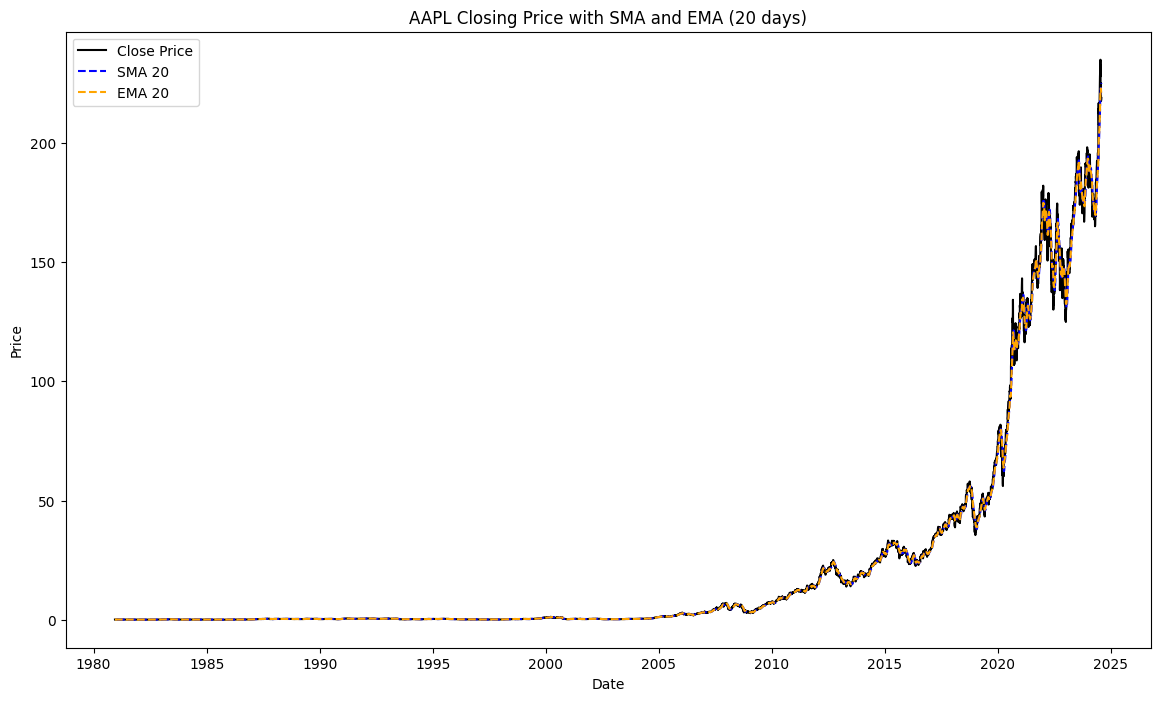

In [20]:
import matplotlib.pyplot as plt

df = stock_data['AAPL'].copy()

plt.figure(figsize=(14, 8))

# Plot Closing price
plt.plot(df.index, df['Close'], label='Close Price', color='black')

# Plot SMA and EMA
plt.plot(df.index, df['SMA_20'], label='SMA 20', color='blue', linestyle='--')
plt.plot(df.index, df['EMA_20'], label='EMA 20', color='orange', linestyle='--')

plt.title('AAPL Closing Price with SMA and EMA (20 days)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()



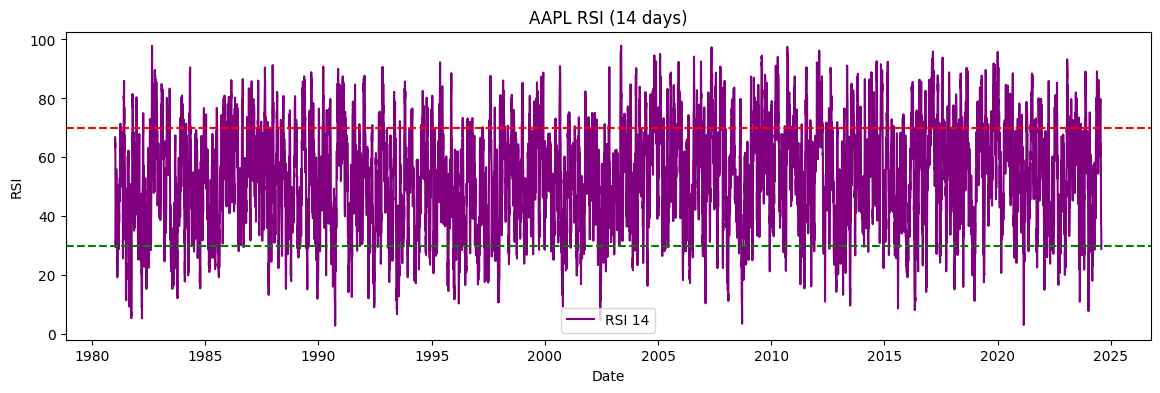

In [21]:
plt.figure(figsize=(14, 4))
plt.plot(df.index, df['RSI_14'], label='RSI 14', color='purple')
plt.axhline(70, color='red', linestyle='--')  # Overbought line
plt.axhline(30, color='green', linestyle='--')  # Oversold line
plt.title('AAPL RSI (14 days)')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend()
plt.show()


In [23]:
# MACD Calculation
# MACD Line = 12-day EMA - 26-day EMA
# Signal Line = 9-day EMA of MACD Line

df['EMA_12'] = df['Close'].ewm(span=12, adjust=False).mean()
df['EMA_26'] = df['Close'].ewm(span=26, adjust=False).mean()
df['MACD'] = df['EMA_12'] - df['EMA_26']
df['MACD_Signal'] = df['MACD'].ewm(span=9, adjust=False).mean()


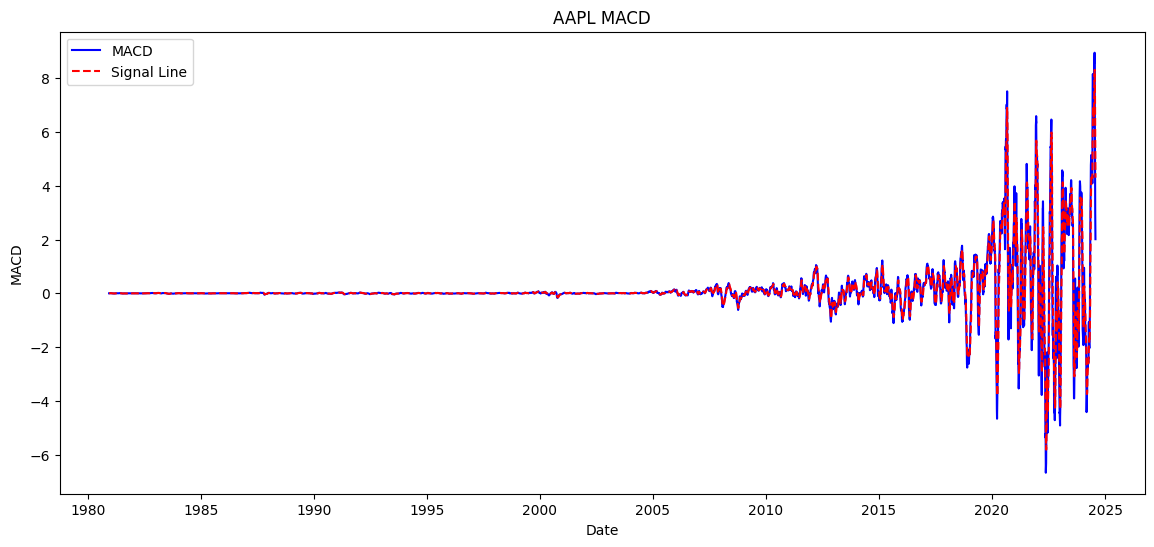

In [24]:
plt.figure(figsize=(14, 6))
plt.plot(df.index, df['MACD'], label='MACD', color='blue')
plt.plot(df.index, df['MACD_Signal'], label='Signal Line', color='red', linestyle='--')
plt.title('AAPL MACD')
plt.xlabel('Date')
plt.ylabel('MACD')
plt.legend()
plt.show()
